# Import and split data into train and test sets

Name: Joseph Arnesen

Class: Stat 420

Date: 10/26/2021

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # this is the decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
seeds = pd.read_csv('seeds.csv')

In [3]:
seeds.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
#split data into features and targets
feature_cols = ['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove']
X = seeds[feature_cols]
y = seeds['Type']

In [5]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1) # 70% training and 30% test

# Decision Tree

In [6]:
# Create Decision Tree classifier object 
clf = DecisionTreeClassifier()

# Train decision tree classifier
clf = clf.fit(X_train, y_train)

# predict the response for the test dataset
y_pred = clf.predict(X_test)

In [7]:
# Determine model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [8]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\josep\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa95532_0        14.4 MB
    ------------------------------------------------------------
                                           Total:        14.4 MB

The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.3-py38haa244f~ --> pkgs/main::conda-4.11.0-py38haa95532_0




conda-4.11.0         | 14.4 MB   |            |   0% 
conda-4.11.0         | 14.4 MB   |            |   0% 
conda-4.11.0         | 14.4 MB   | 4          |   4% 
conda-4.11.0         | 14.4 MB   | 6          |   7% 
conda-4.11.0         | 14.4 MB   | #1         |  11% 
conda-4.11.0         | 14.4 MB   | #4         |  14% 
conda-4.11.0         | 14.4 MB   | 

In [11]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\josep\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0




conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   | 3          |   4% 
conda-4.11.0         | 16.9 MB   | 8          |   8% 
conda-4.11.0         | 16.9 MB   | #1         |  12% 
conda-4.11.0         | 16.9 MB   | #5    

In [12]:
# visualize tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Display the Decision Tree
# Note - Value shows a list that is the count of each class at that point in the tree
def displayTree(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file = dot_data,  
                filled = True, rounded = True, impurity = True,
                special_characters = True, feature_names = feature_cols, class_names = ['1', '2', '3'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('seeds.png')
    Image(graph.create_png())

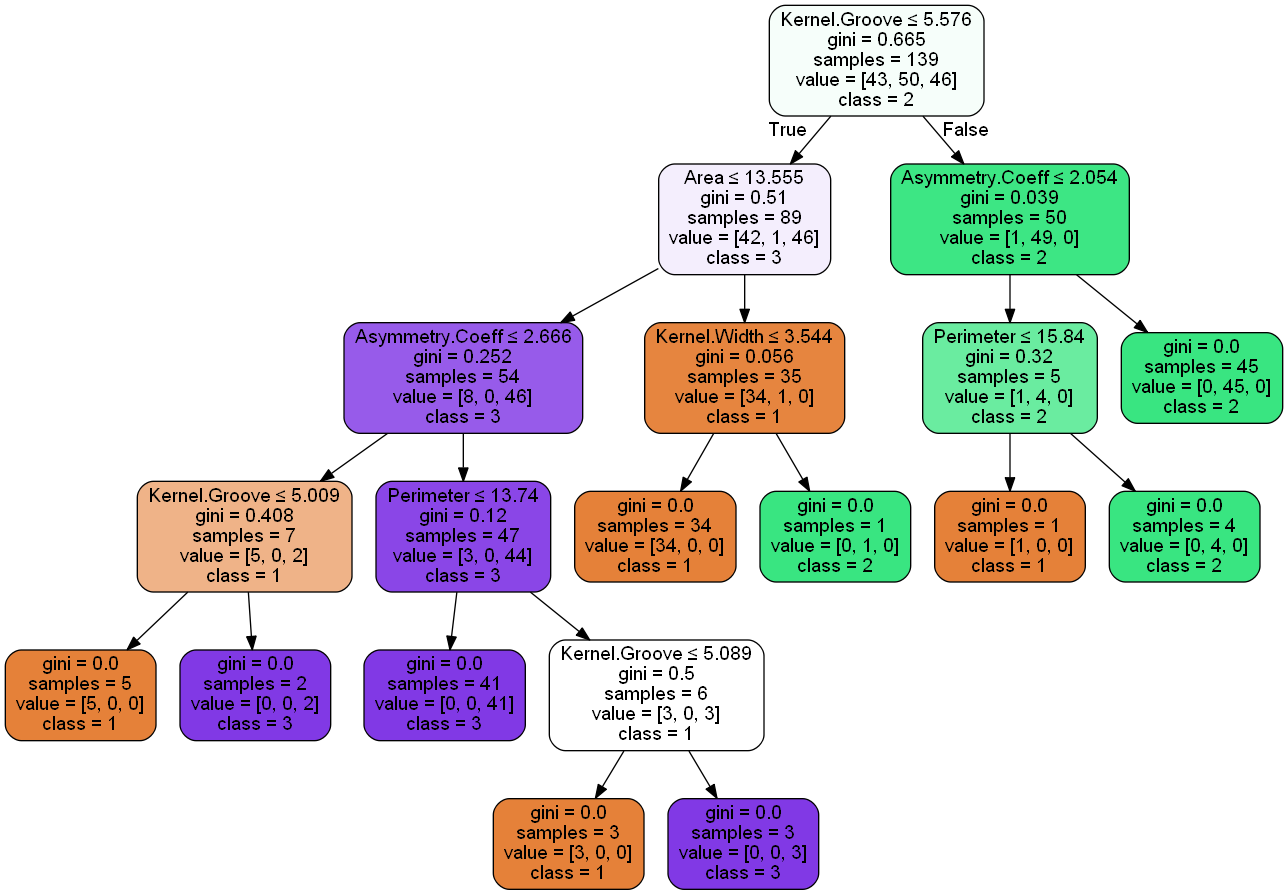

In [13]:
displayTree(clf)
Image('seeds.png')

In [14]:
# create new decision tree classifier with a specified max_depth
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, max_depth=3)

# train the above model
clf2 = clf2.fit(X_train, y_train)

# predict new values
y_pred = clf2.predict(X_test)

# calculate accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

best_accuracy_dectree = metrics.accuracy_score(y_test,y_pred)

Accuracy: 0.8333333333333334


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# instantiate knn model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9


In [16]:
# try many different values of n_neighbors
k_range = range(1,31)
scores_list = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy score')

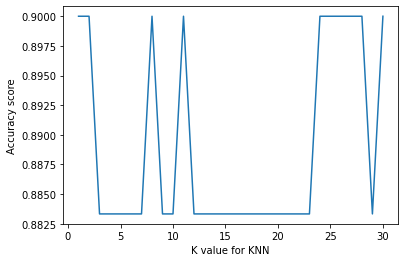

In [17]:
# plot the accuracies for the different values of k
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel("K value for KNN")
plt.ylabel("Accuracy score")

In [18]:
# we can choose several different values of k to get an accuracy of 0.9
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
best_accuracy_knn = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9


# Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# create classifier
mnnb = MultinomialNB(alpha=1)

# train model
mnnb.fit(X_train, y_train)

# use model to predict target
y_pred = mnnb.predict(X_test)

# Find accuracy
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7833333333333333


In [20]:
# I didn't see any hyperparameters for Naive Bayes so I decided to implement different types of Naive Bayes
# implement other types of Naive Bayes: GaussianNB, ComplementNB, BernoulliNB, and CategoricalNB
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
Gaussian_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy for GaussianNB: ", metrics.accuracy_score(y_test,y_pred))

# implement ComplementNB
compnb = ComplementNB()
compnb.fit(X_train, y_train)
y_pred = compnb.predict(X_test)
print("Accuracy for ComplementNB: ", metrics.accuracy_score(y_test,y_pred))

# implement BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Accuracy for BernoulliNB: ", metrics.accuracy_score(y_test,y_pred))

# save best accuracy 
best_accuracy_naive_bayes = Gaussian_accuracy

Accuracy for GaussianNB:  0.9
Accuracy for ComplementNB:  0.7666666666666667
Accuracy for BernoulliNB:  0.3


# SVM

In [21]:
# implement basic SVM
from sklearn import svm
svm_clf = svm.SVC(kernel='linear', C=5, gamma=4)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9333333333333333


In [22]:
# implement SVMs with other kernel functions
from sklearn import svm

# implement with linear kernel
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
print("Accuracy with linear kernel: ", metrics.accuracy_score(y_test,y_pred))
lin_kernel_acc = metrics.accuracy_score(y_test,y_pred)

# implement with poly kernel
svm_poly = svm.SVC(kernel = 'poly')
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
print("Accuracy with 'poly' kernel: ", metrics.accuracy_score(y_test,y_pred))

# implement with sigmoid kernel
svm_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred = svm_sigmoid.predict(X_test)
print("Accuracy with sigmoid kernel: ", metrics.accuracy_score(y_test,y_pred))

# save best accuracy (either linear or poly)
best_accuracy_svm = lin_kernel_acc

Accuracy with linear kernel:  0.9166666666666666
Accuracy with 'poly' kernel:  0.9166666666666666
Accuracy with sigmoid kernel:  0.3


# MLP

In [23]:
# implement basic MLP
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(activation = 'tanh', solver='adam', learning_rate='constant', alpha=1e-5, 
                        hidden_layer_sizes=(7,3,3), random_state=1, max_iter=10000)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9333333333333333


In [24]:
# implement MLP with variatoins in hyperparameters
ACTIVATION = 'tanh'
SOLVER = 'adam'
LEARNING_RATE = 'constant'
ALPHA = 1e-4
HIDDEN_LAYERS = (7,7,7)
MAX_ITER = 10000

mlp_clf = MLPClassifier(activation = ACTIVATION, solver=SOLVER, learning_rate=LEARNING_RATE, alpha=ALPHA, 
                        hidden_layer_sizes=HIDDEN_LAYERS, random_state=1, max_iter=10000)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

# after testing different hyper parameters, the above set of parameters gave the best accuracy
best_accuracy_mlp = metrics.accuracy_score(y_test,y_pred)

Accuracy:  0.9333333333333333


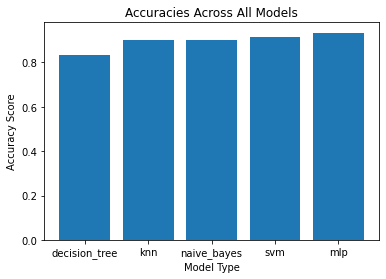

In [25]:
# create a simple bar chart of all accuracies
import matplotlib.pyplot as plt
all_models = ['decision_tree', 'knn', 'naive_bayes', 'svm', 'mlp']
all_accuracies = [best_accuracy_dectree, best_accuracy_knn, best_accuracy_naive_bayes, best_accuracy_svm, best_accuracy_mlp]
plt.bar(all_models,all_accuracies)
plt.title("Accuracies Across All Models")
plt.xlabel("Model Type")
plt.ylabel("Accuracy Score")
plt.show()

We can see the the SVM model is slightly higher than the other four models. So for this particular dataset the SVM model gives the best predictions. However, all of the models are very accurate. 